# Trump Speech Analysis

@ Zoe Yang PSC290: Python



In [44]:
#Import the packages
import nltk
import pickle


from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

nltk.download("stopwords") #Import stopwords and punctuation from NLTK
from string import punctuation
from nltk.corpus import stopwords
from nltk.probability import FreqDist


[nltk_data] Downloading package stopwords to /Users/Z/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Import the files

First, let's create corpus from the annotated corpus files from the 2016 presidential candidate debates

In [32]:
trump_corpus = nltk.corpus.PlaintextCorpusReader('Clinton-Trump-Corpus/Trump/','Trump_.*.txt')

In [33]:
#check to make sure that they are loaded in. There are 82 files from which it pulls the langage data.
len(trump_corpus.fileids())

82

Yay!!! The corpus files have been loaded.

In [34]:
#optional for later comparison: clinton_corpus = nltk.corpus.PlaintextCorpusReader('Clinton-Trump-Corpus/Clinton/','Clinton_.*.txt')

In [35]:
#check to make sure that they are loaded in
#len(clinton_corpus.fileids())

# Clean the files

Remove extraneous information like <applause>, punctuation, and stop words from the Trump corpus.


In [36]:
#Convert texts into appropriate types
trump_raw = trump_corpus.raw()
trump_words = trump_corpus.words()
trump_text = nltk.Text(trump_words)


In [37]:
def clean_up_data(x):
    filtered_for_punctuation = x
    filtered_for_punctuation = filtered_for_punctuation.lower() #convert all words to lowercase
    filtered_for_punctuation = re.sub("[\(\[].*?[\)\]]", "", filtered_for_punctuation) #remove parentheses
    filtered_for_punctuation = re.sub("[\<\[].*?[\>\]]", "", filtered_for_punctuation) #remove carrots    for punc in punctuation:
    for punc in punctuation:
        filtered_for_punctuation = filtered_for_punctuation.replace(punc, "") #remove punctuation
    filtered_for_punctuation = nltk.wordpunct_tokenize(filtered_for_punctuation) #tokenize text
    filtered_for_punctuation = [word for word in filtered_for_punctuation if word.lower() not in stopwords.words('english')] #remove stopwords
        #note that stopwords include words like very and against 
    return filtered_for_punctuation

In [150]:
clean_trump = clean_up_data(trump_raw)
clean_trump_text = nltk.Text(clean_trump)

## Concordance
Information about the text surrounding certain topics.

How often does Trump reference the below topics, and what is the context around them?

In [128]:
clean_trump_text.concordance("violence", 70, lines = 10)


Displaying 10 of 51 matches:
w come especially track record violence world hell need well build saf
nnot condemn hatred oppression violence radical islam lacks moral clar
es iraq experiencing reduction violence group would become call isis c
ology provides breeding ground violence terrorism grow breeding ground
 new years seen reports sexual violence assault far greater anybody kn
cult difficult difficult times violence riots destruction taken place 
g lawless conduct anyone crime violence attack poor never accepted tru
ifficult times difficult chaos violence streets assault law enforcemen
ens im elected president chaos violence end end quickly every single c
ng parents whove lost children violence spilling across border parents


In [127]:
clean_trump_text.similar("violence")

dont people horrible happen thats happened place country evil rates
soaring homicide harassment


In [126]:
print(clean_trump_text.similar("Mexico"))

people know theyre going win country think im folks right thats
countries like happen said say many dont things youre
None


In [125]:
print(clean_trump_text.similar("Hillary"))

bill clinton know shes people said country look believe dont see
things folks youre trump great thats also say cant
None


In [198]:
print(clean_trump_text.similar("jobs"))

people companies going country back money work right theyre think job
folks look good dont know great want education pennsylvania
None


## Word Frequency

>What are the top 25 most frequently words in Trump's speeches/debates pre-election?

In [151]:
TrumpFreqDist = FreqDist(clean_trump)
TrumpTop25 = TrumpFreqDist.most_common(25)
TrumpTop25

[('going', 5186),
 ('people', 3155),
 ('know', 2284),
 ('country', 1848),
 ('dont', 1772),
 ('great', 1729),
 ('said', 1586),
 ('right', 1515),
 ('one', 1504),
 ('theyre', 1462),
 ('hillary', 1460),
 ('get', 1381),
 ('want', 1360),
 ('like', 1344),
 ('thats', 1265),
 ('jobs', 1253),
 ('im', 1160),
 ('clinton', 1142),
 ('think', 1070),
 ('say', 1070),
 ('thank', 1062),
 ('back', 1007),
 ('never', 924),
 ('well', 917),
 ('make', 913)]

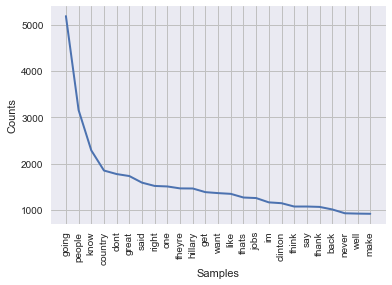

In [197]:
FreqDist(clean_trump).plot(25, cumulative=False)

>## Gratefulness words



How does trump use words indicating gratefulness or happiness?

Trump says thank 1062 times, happy 121 times, grateful 3 times, welcome 3 times. See below for words used similarly to these as well.

In [164]:
TrumpFreqDist['thank'] 

1062

In [165]:
clean_trump_text.similar('thanks')

thank much really days know im youre boy everybody shes trade november


In [166]:
clean_trump_text.similar('happy')

going people think happen well make country dont know win tough way
say saying gone jobs gonna good believe right


In [167]:
TrumpFreqDist['happy'] 

121

In [168]:
clean_trump_text.similar('happy')

going people think happen well make country dont know win tough way
say saying gone jobs gonna good believe right


In [169]:
TrumpFreqDist['grateful'] 

3

In [158]:
clean_trump_text.similar('grateful')

thank much folks everybody lot love


In [159]:
#how unwelcoming!
TrumpFreqDist['welcome'] 

3

In [160]:
clean_trump_text.similar('welcome')

leave goes across


In [161]:
clean_trump_text.concordance('welcome')

Displaying 3 of 3 matches:
nk commanderinchief big john really welcome fantastic time walked fantastic als
n americans people different faiths welcome join great country promote american
implify taxes going make businesses welcome country going reduce taxes middlein


>## Narcissism? Number of times he used I, me, myself, or references Trump

In [171]:
TrumpFreqDist_nf = FreqDist(trump_text) #uses version with stop words, not cleaned.
TrumpFreqDist_nf['me']

1344

In [172]:
TrumpFreqDist_nf['I']

10029

In [173]:
TrumpFreqDist_nf['myself']

55

In [174]:
TrumpFreqDist_nf['my']

747

In [187]:
TrumpFreqDist['trump']

655

>## Trumpisms
This section is HYUUUUUGE.

In [108]:
#def unusual_words(text):
#    text_vocab = set(w.lower() for w in text if w.isalpha())
#    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
#   unusual = text_vocab.difference(english_vocab) 
#    return unusual
#unusual_words(clean_trump)

**Unique Words**

In [102]:
#unique words
words_only = [w for w in clean_trump if w.isalpha()]
unique = set([w.lower() for w in words_only])
word_count = len(unique)
unique

{'enjoyed',
 'landings',
 'dead',
 'bully',
 'leannas',
 'certification',
 'wishes',
 'killer',
 'toledo',
 'shared',
 'harolds',
 'obmacare',
 'devalues',
 'outsiders',
 'fate',
 'secondclass',
 'dayton',
 'invade',
 'terrorist',
 'projobs',
 'quotes',
 'overcomplicated',
 'swore',
 'ensure',
 'comey',
 'olander',
 'twitter',
 'gets',
 'foods',
 'donna',
 'regalia',
 'houston',
 'nap',
 'readiness',
 'gained',
 'simple',
 'nonbelievers',
 'cases',
 'lover',
 'exchanges',
 'discredit',
 'whacked',
 'oldest',
 'laugh',
 'deficient',
 'way',
 'economic',
 'consistently',
 'gq',
 'steyer',
 'manner',
 'pa',
 'fundraising',
 'dishonest',
 'approaches',
 'investigating',
 'remade',
 'medal',
 'providing',
 'served',
 'laborers',
 'unsuccessful',
 'exploiting',
 'drugs',
 'manipulation',
 'banged',
 'drill',
 'paying',
 'nationally',
 'neighborhoods',
 'pervert',
 'armorplated',
 'heads',
 'critic',
 'house',
 'charity',
 'brexits',
 'perform',
 'investments',
 'antienergy',
 'activated',
 '

In [111]:
fdist = FreqDist(clean_trump)
words = [(w, fdist[w]) for w in fdist.keys() if len(w) > 10 and fdist[w] > 10]

**Number of times he said bigly?** 4

In [117]:
biglyfreq = FreqDist(clean_trump_text)
biglyfreq['bigly'] # 4

4

In [192]:
TrumpFreqDist_nf['huge']

19

In [193]:
TrumpFreqDist_nf['big']

568

In [195]:
TrumpFreqDist_nf['really']

627

## Lexical Diversity

In [200]:
#lexical diversity function
def lexical_diversity(text): 
    return len(set(text)) / len(text)


In [204]:
trumpLE = lexical_diversity(clean_trump_text)
trumpLE

0.041923533934437686

> ## Obama speech comparison

**First, clean the text**

In [ ]:
obama_corpus = nltk.corpus.PlaintextCorpusReader('Corpus-of-Presidential-Speeches/','obama.*.txt')

#check to make sure that they are loaded in. There are 48 files, so it worked.
len(obama_corpus.fileids())

#Convert texts into appropriate types
obama_raw = obama_corpus.raw()
obama_words = obama_corpus.words()
obama_text = nltk.Text(obama_words)


clean_obama = clean_up_data(obama_raw)
clean_obama_text = nltk.Text(clean_obama)


In [238]:
ObamaLE = lexical_diversity(clean_obama_text)
print(ObamaLE)

0.10519425161368895


## Obama vs. Trump
**Lexical Diversity:**
    
    OBAMA: 0.1051
    TRUMP: 0.0419

# Corpus Citations##

Brown, D. W. (2017) Clinton-Trump Corpus. Retrieved from http://www.thegrammarlab.com

Brown, D. W. (2016) Corpus of Presidential Speeches. Retrieved from http://www.thegrammarlab.com
